<center><img src="picture.jpg" width="600" height="500" /></center>

In [1]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

In [101]:
# Define the file paths for input and label data
path_input = 'E:/Deep Course/Weeks/W10/Data/Test(without Uncertainty)/input_file_10.npy'
path_label = 'E:/Deep Course/Weeks/W10/Data/Test(without Uncertainty)/label_file_10.npy'

# Load input data from the specified file path using NumPy
input_data = np.load(path_input)

# Load label data from the specified file path using NumPy
label_data = np.load(path_label)


In [102]:
print(input_data.shape)
print(label_data.shape)

(64, 64, 12)
(64, 64, 1)


In [103]:
# Create an empty NumPy array 'img' with shape (1, 64, 64, 12) and data type 'float32'
img = np.zeros((1, 64, 64, 12), dtype='float32')

# Assign the content of 'input_data' to the first element of 'img' (assuming 'input_data' has compatible dimensions)
img[0] = input_data


In [104]:
model=load_model('E:/Deep Course/Weeks/W10/Models/model-200MC.h5',compile=False)

In [105]:
model.summary()

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 64, 64, 12)] 0                                            
__________________________________________________________________________________________________
conv2d_187 (Conv2D)             (None, 64, 64, 64)   6976        input_18[0][0]                   
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 64, 64, 128)  73856       conv2d_187[0][0]                 
__________________________________________________________________________________________________
conv2d_193 (Conv2D)             (None, 64, 64, 64)   73792       conv2d_188[0][0]                 
___________________________________________________________________________________________

In [106]:
model.layers

In [107]:
# Set the value of 'n' to 1 (indicating the layer index)
n = 12

# Create a new model that takes the same inputs as the original model but outputs the feature maps of a specific layer
new_model = Model(inputs=model.inputs, outputs=model.layers[n].output)

# Use the new model to predict feature maps for the input image
feature_maps = new_model.predict(img)


In [108]:
feature_maps.shape,img.shape

((1, 64, 64, 16), (1, 64, 64, 12))

In [109]:
label_data.shape

(64, 64, 1)

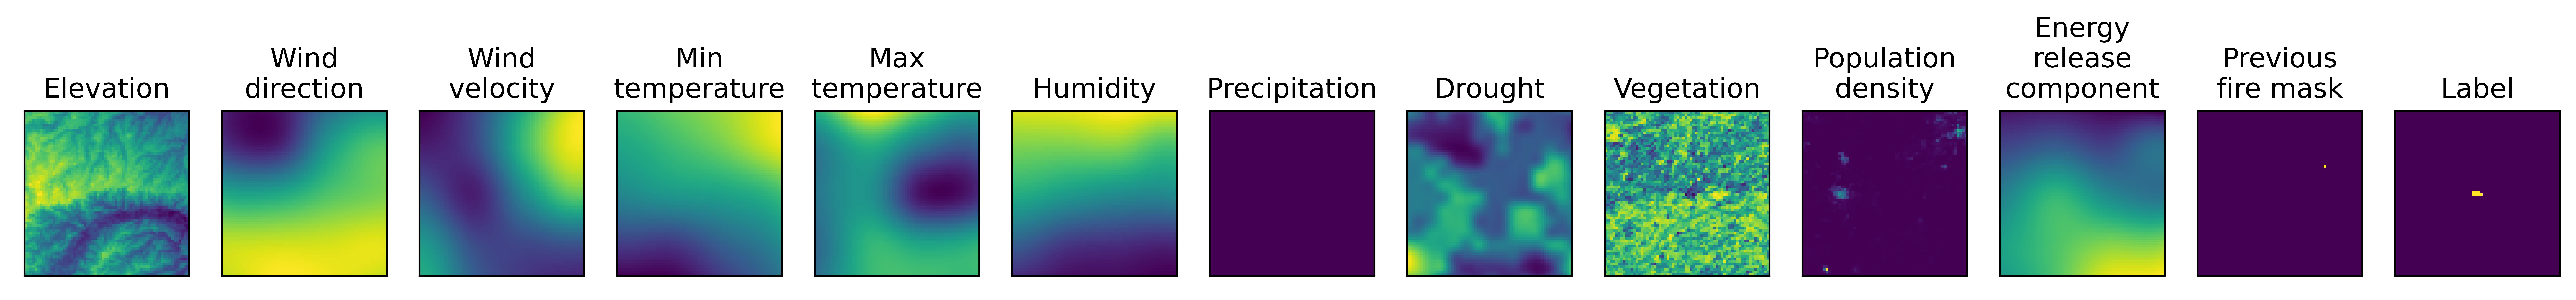

In [110]:
# Define a list of titles for the subplots
TITLES = [
    'Elevation',
    'Wind\ndirection',
    'Wind\nvelocity',
    'Min\ntemperature',
    'Max\ntemperature',
    'Humidity',
    'Precipitation',
    'Drought',
    'Vegetation',
    'Population\ndensity',
    'Energy\nrelease\ncomponent',
    'Previous\nfire mask',
    'Label',  # Special title for the last subplot
]

# Create a figure with a specified size and DPI
plt.figure(figsize=(20, 10), dpi=1000)

# Iterate through the range of 13 (number of subplots)
for i in range(13):
    if i == 12:
        # For the last subplot, show the label data as an image
        plt.subplot(1, 13, i + 1)
        plt.imshow(label_data[:, :, 0])
        plt.xticks([])
        plt.yticks([])
        plt.title(TITLES[i])  # Set the title for the subplot
    else:
        # For other subplots, show the image data at the i-th channel
        plt.subplot(1, 13, i + 1)
        plt.imshow(img[0, :, :, i])
        plt.xticks([])
        plt.yticks([])
        plt.title(TITLES[i])  # Set the title for the subplot

# Display the entire figure with subplots
plt.show()

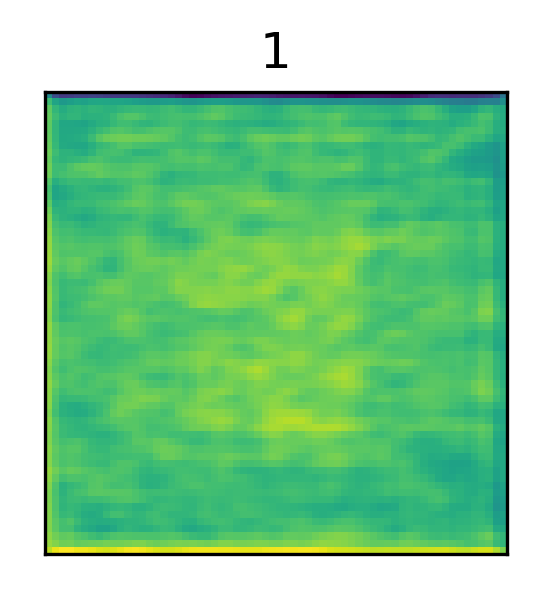

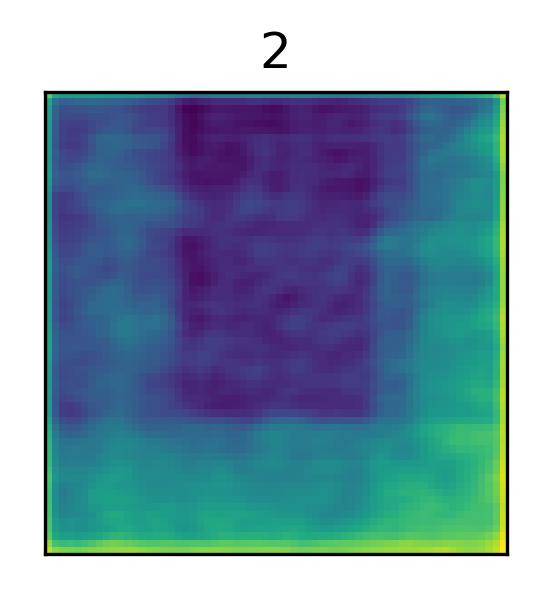

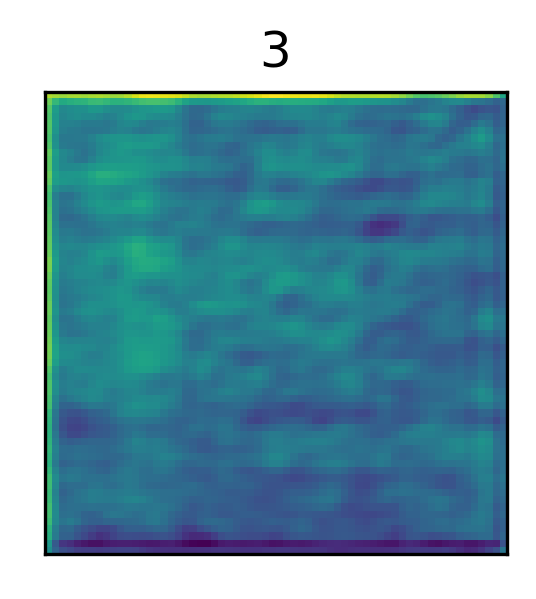

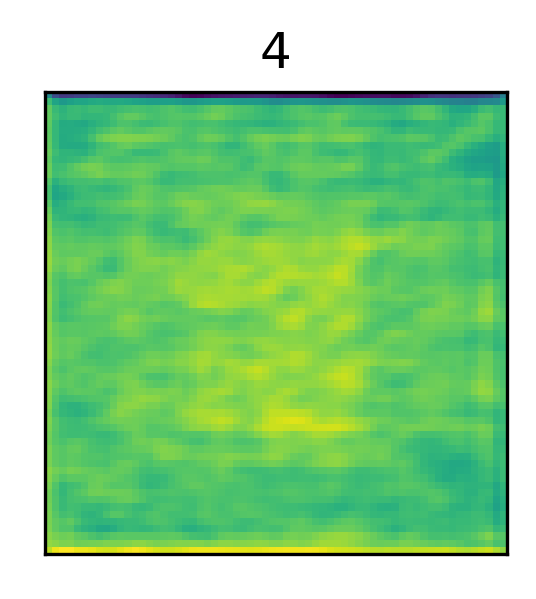

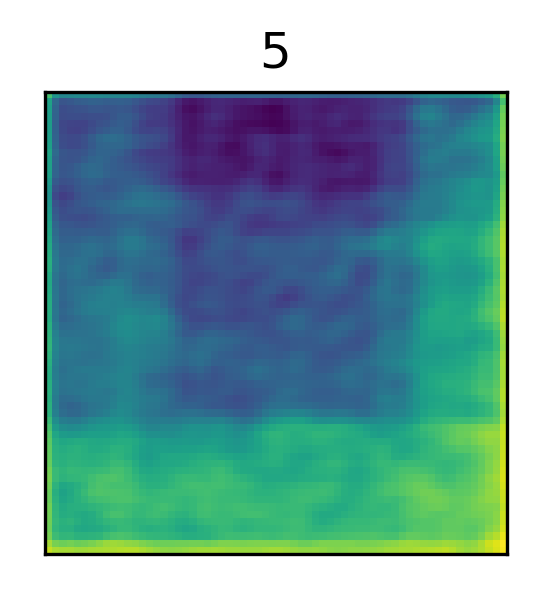

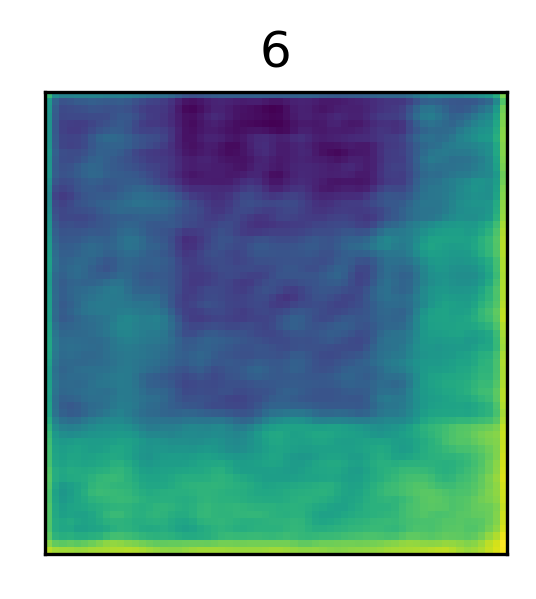

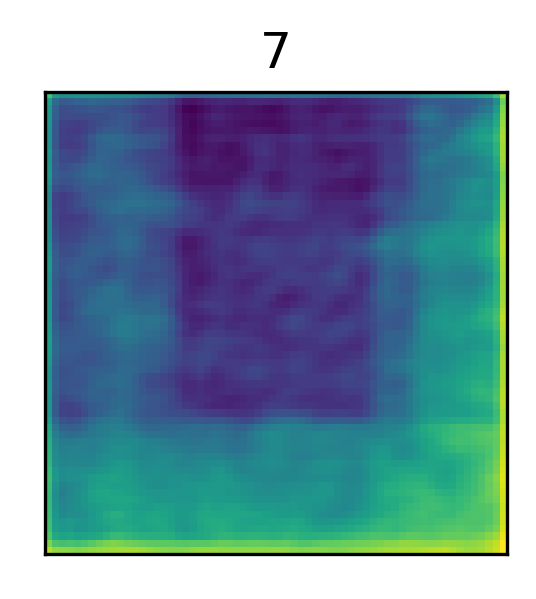

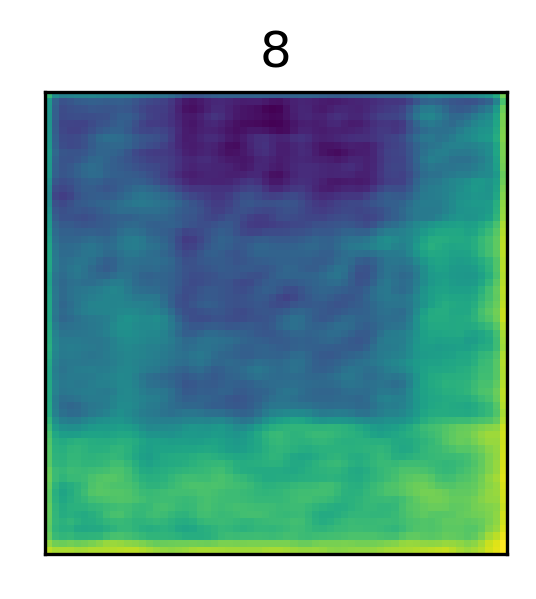

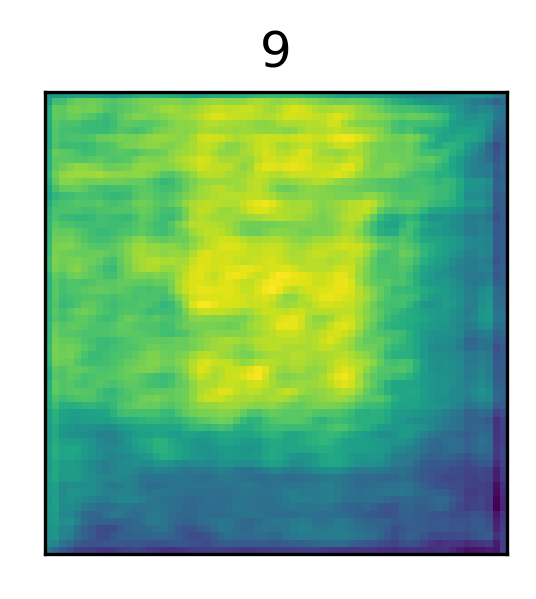

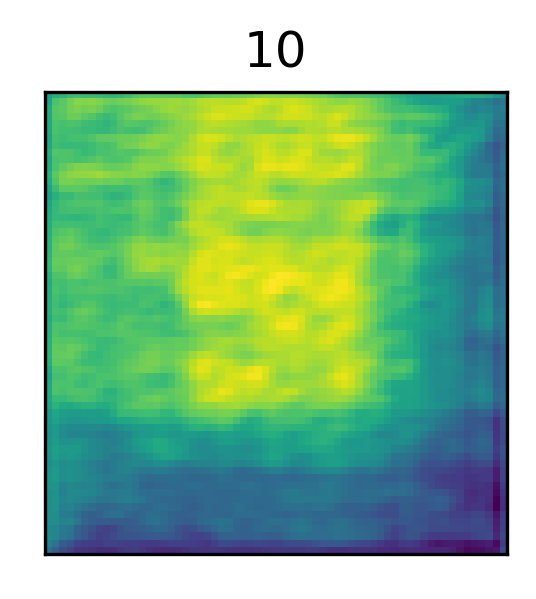

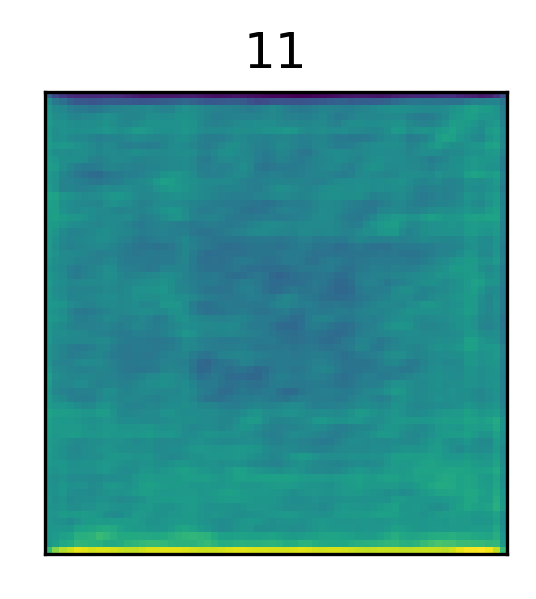

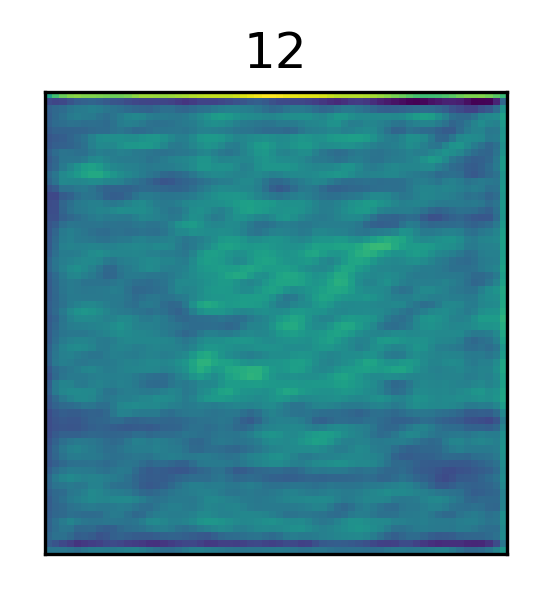

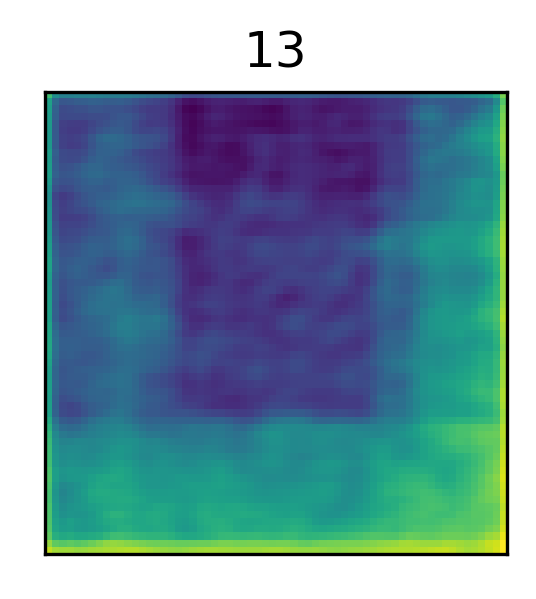

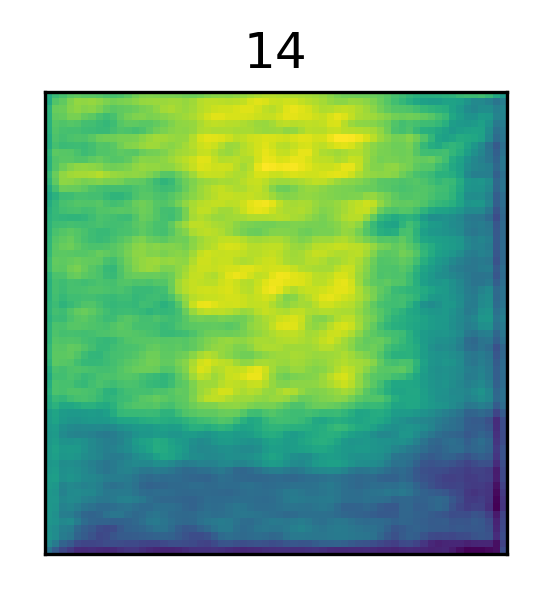

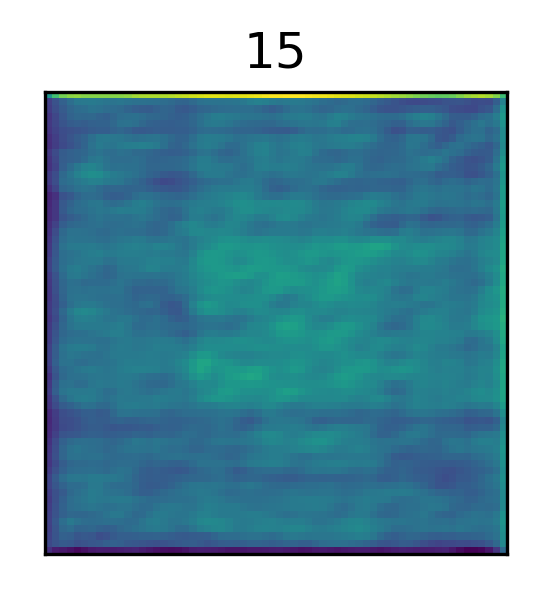

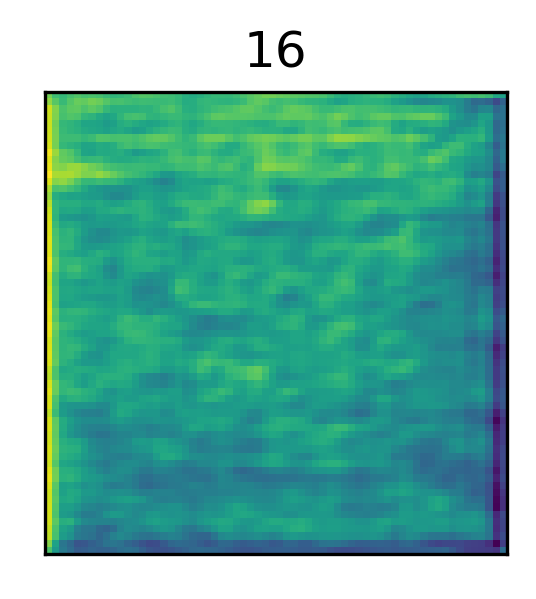

In [111]:
# Iterate through the range of feature map channels
for i in range(feature_maps.shape[-1]):
    # Create a new figure with a small size and high DPI
    plt.figure(figsize=(2, 2), dpi=300)
    
    # Show the i-th feature map as an image with a colormap (e.g., 'hot' colormap)
    plt.imshow(feature_maps[0, :, :, i])
    
    # Remove x and y tick labels
    plt.xticks([])
    plt.yticks([])
    
    # Set the title of the subplot to the index (1-based) of the feature map
    plt.title(str(i + 1))
    
    # Display the current subplot
    plt.show()
